<a href="https://colab.research.google.com/github/ge43jef/GEEHYDRO/blob/main/task1_frmLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


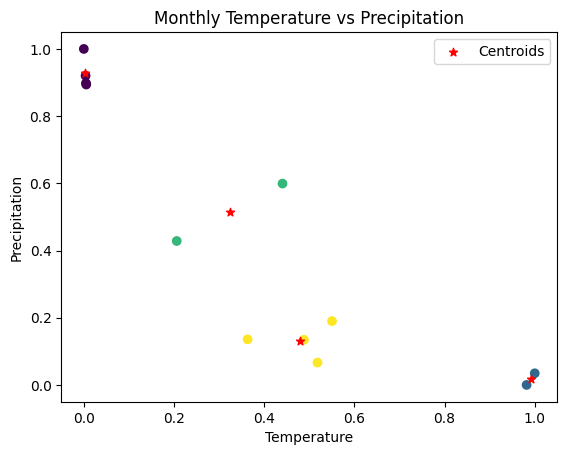

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Read the data from the text file
with open('task1data.csv', 'r') as f:
    lines = f.readlines()

# Initialize variables
num_of_rows = len(lines)
var = np.zeros((num_of_rows - 1, 2))  # save two variables from the file

# load the data
for num in range(1, num_of_rows):  # we don't need the first row
    xx = lines[num].strip()  # variable to save each line of lines
    l = []
    for t in xx.split(','):
        try:
            l.append(float(t))
        except ValueError:
            pass
    var[num - 1, :] = l[1:3]

# Scaling the variables have large diff.
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(var)

# Perform K-means clustering
kmeans = KMeans(init="random", n_clusters=4, random_state=0)
kmeans.fit(scaled_data)
centroids = kmeans.cluster_centers_

# Plot the scatter plot with centroid points
fig, ax = plt.subplots(1, 1)
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_)
ax.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='*', label='Centroids')
ax.set_title("Monthly Temperature vs Precipitation")
ax.set_xlabel("Temperature")
ax.set_ylabel("Precipitation")
ax.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

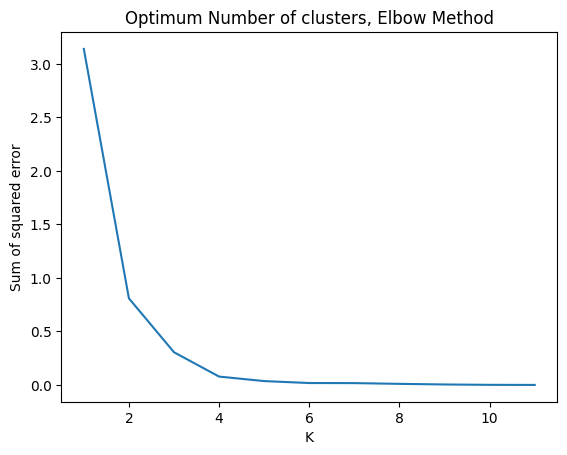

In [24]:
k_rng = range (1, 12) ###maximum cluster can be total data points
sse =[]
for k in k_rng:
  km=KMeans(init="random", n_clusters=k, random_state=0)
  km.fit(scaled_data)
  sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title("Optimum Number of clusters, Elbow Method")
plt.plot(k_rng,sse)